# **PCA**

Task 1: Exploratory Data Analysis (EDA)

1.Load the dataset and perform basic data exploration.

2.Examine the distribution of features using histograms, box plots, or density plots.

3.Investigate correlations between features to understand relationships within the data.

Task 2: Dimensionality Reduction with PCA

1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

3.Transform the original dataset into the principal components.
Task

Task 3: Clustering with Original Data

1.Apply a clustering algorithm (e.g., K-means) to the original dataset.

2.Visualize the clustering results using appropriate plots.

3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

Task 4: Clustering with PCA Data

1.Apply the same clustering algorithm to the PCA-transformed dataset.

2.Visualize the clustering results obtained from PCA-transformed data.

3.Compare the clustering results from PCA-transformed data with those from the original dataset.

Task 5: Comparison and Analysis

1.Compare the clustering results obtained from the original dataset and PCA-transformed data.

2.Discuss any similarities or differences observed in the clustering results.

3.Reflect on the impact of dimensionality reduction on clustering performance.

4.Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Task 6: Conclusion and Insights

1.Summarize the key findings and insights from the assignment.

2.Discuss the practical implications of using PCA and clustering in data analysis.

3.Provide recommendations for when to use each technique based on the analysis conducted.

**Task 1: Exploratory Data Analysis (EDA)**

1) Load the dataset and perform basic data exploration.

In [ ]:
import pandas as pd

# Load the dataset
wine_data = pd.read_csv('wine.csv')

# Display the first few rows of the dataset
print(wine_data.head())

# Display basic information about the dataset
print(wine_data.info())

# Display summary statistics of the dataset
print(wine_data.describe())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

2) Examine the distribution of features using histograms, box plots, or density plots.

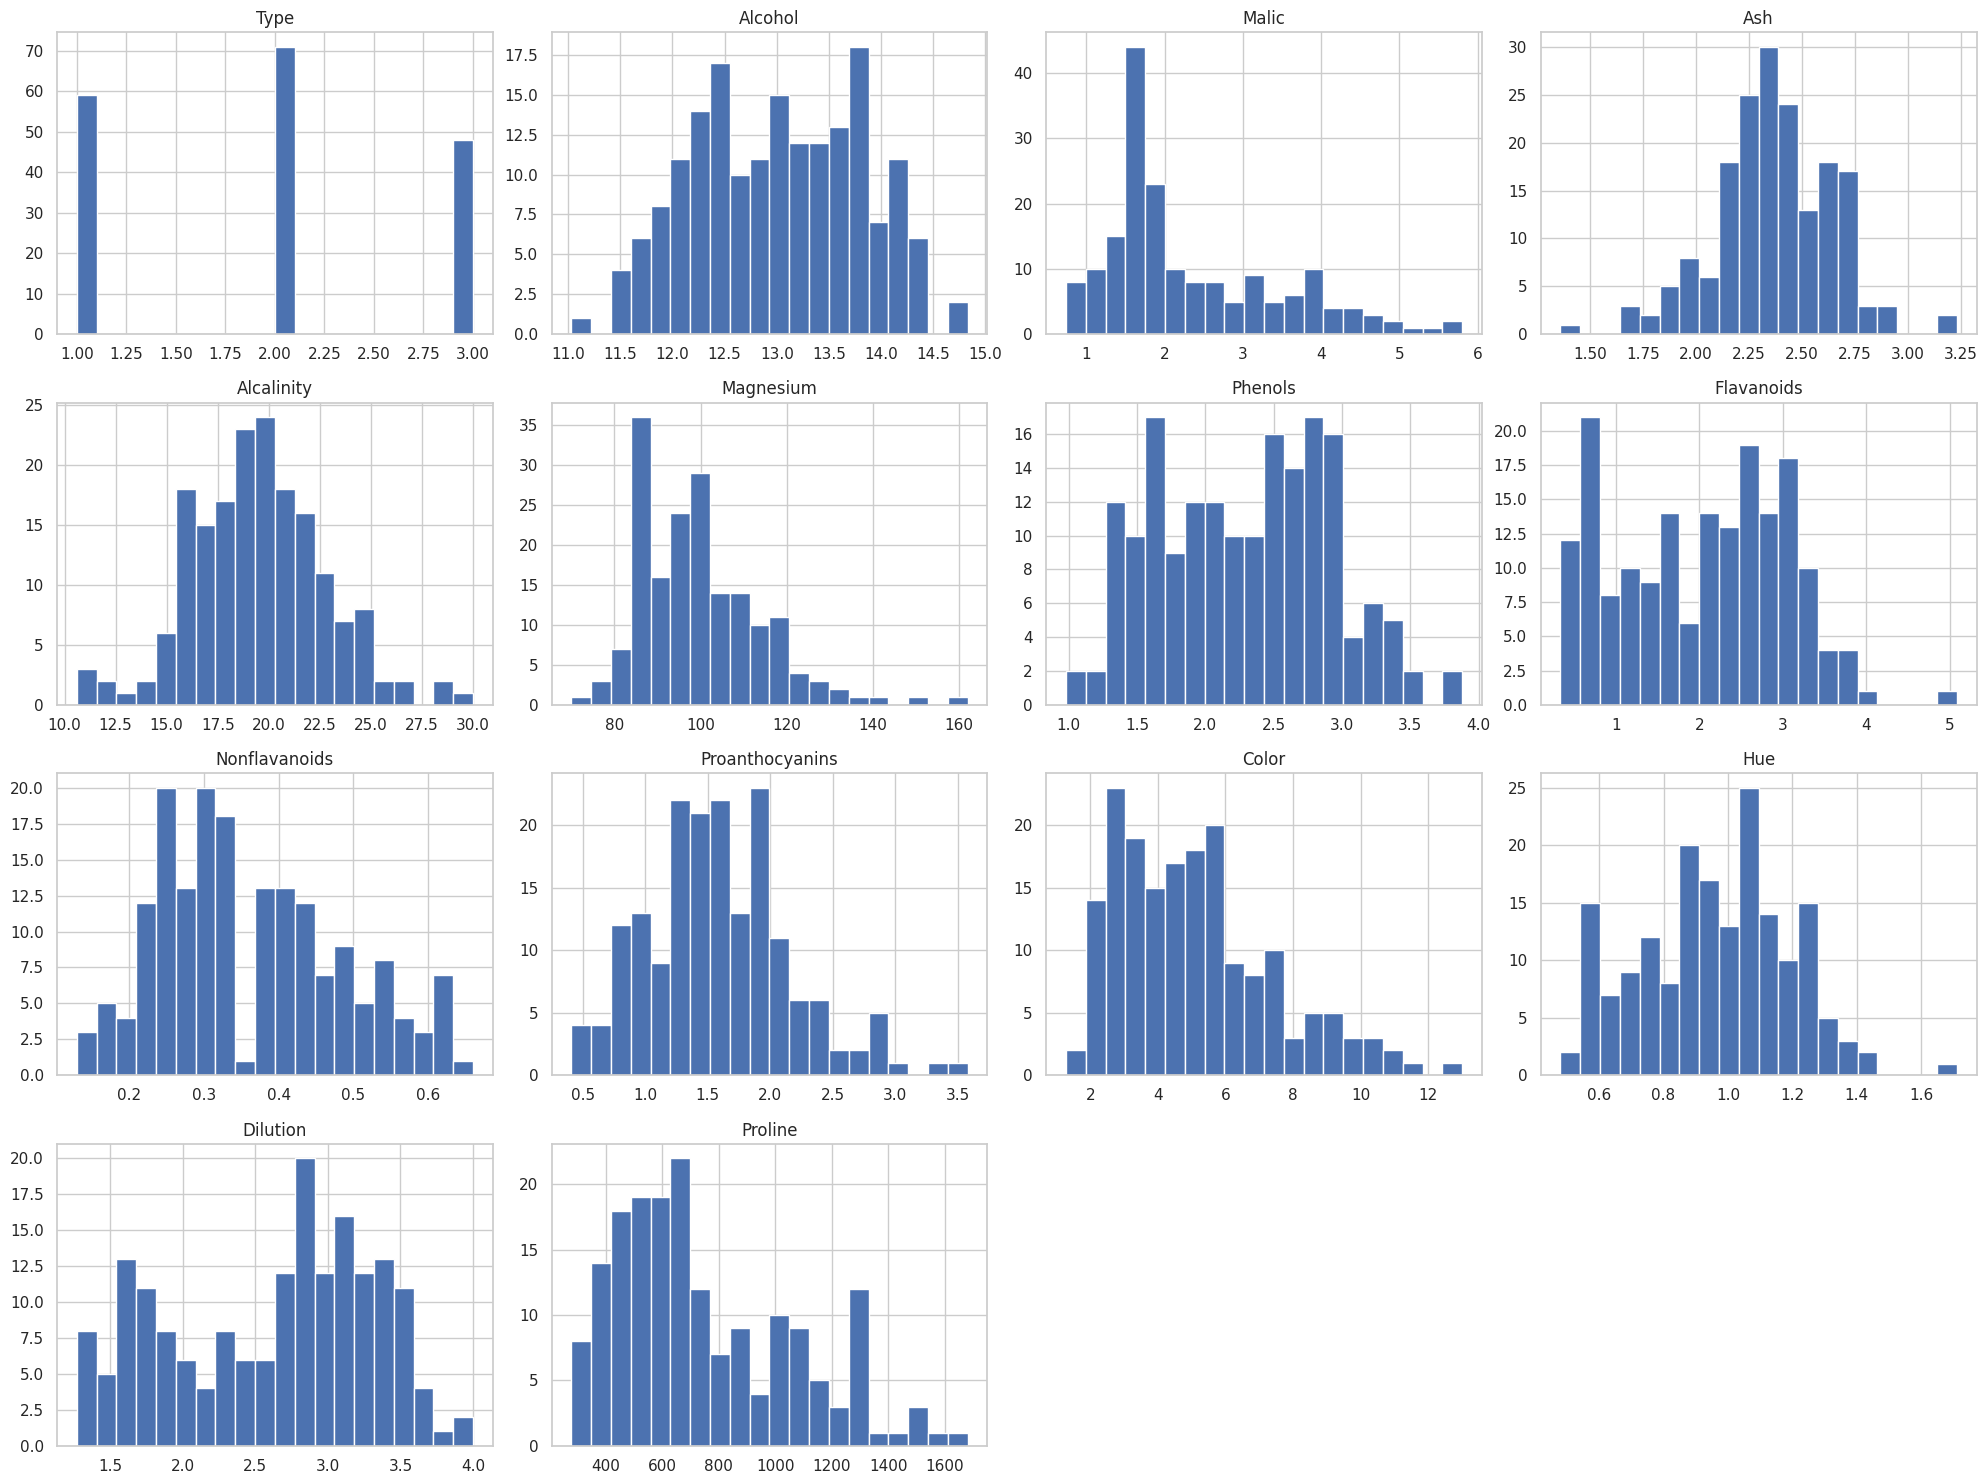

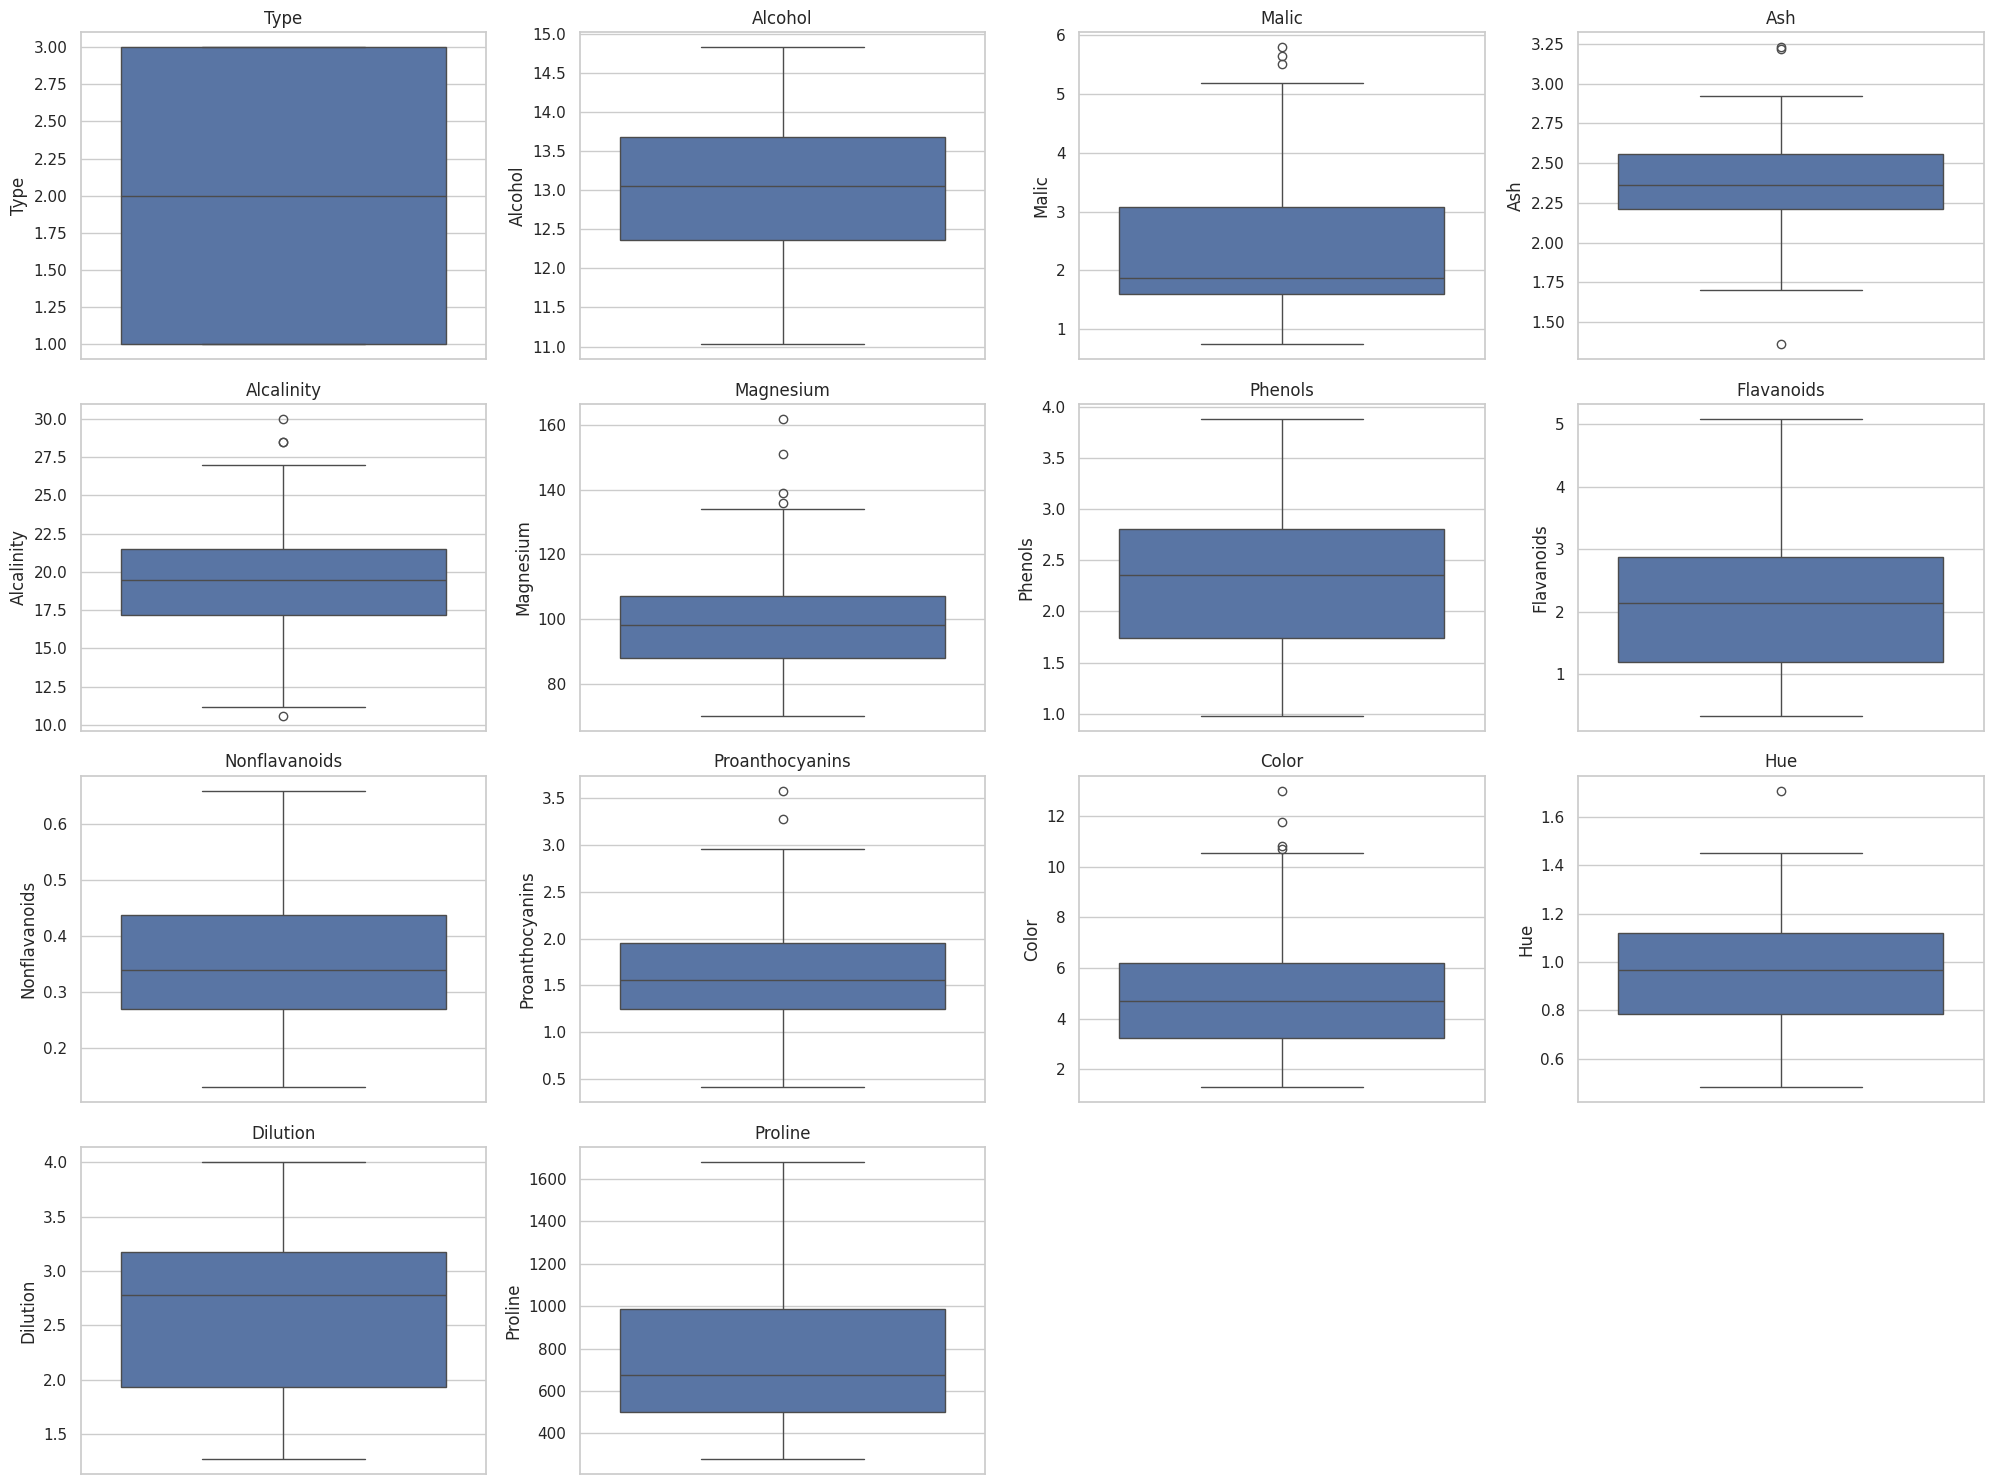

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plot histograms for each feature
wine_data.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=wine_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


3) Investigate correlations between features to understand relationships within the data.

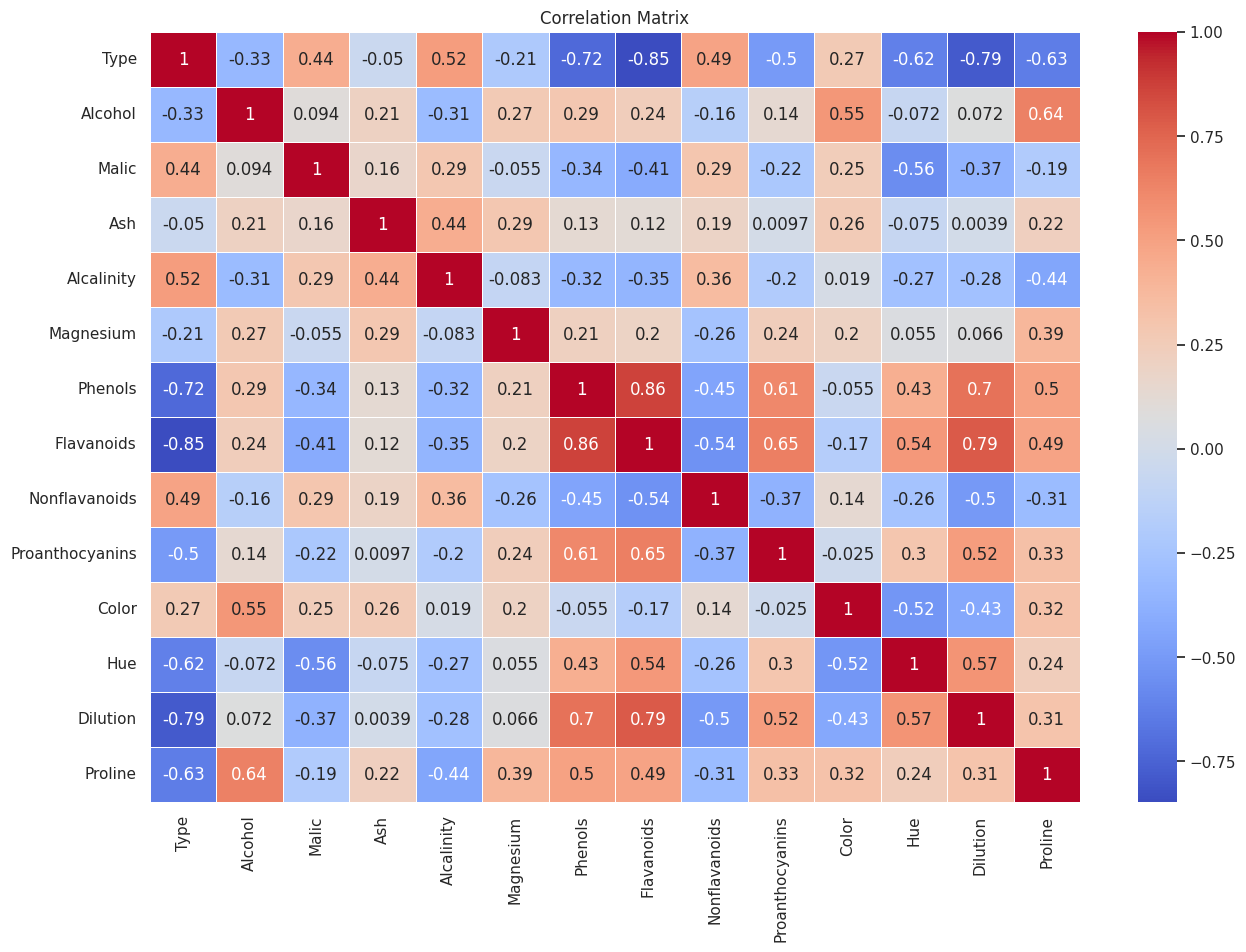

In [ ]:
# Calculate the correlation matrix
correlation_matrix = wine_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Task 2: Dimensionality Reduction with PCA**

1) Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target variable
features = wine_data.drop('Proline', axis=1)  # Replace 'target_column' with the name of your target column
target = wine_data['Proline']  # Replace 'target_column' with the name of your target column

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit PCA
pca = PCA()
pca.fit(scaled_features)

# Transform the features
pca_features = pca.transform(scaled_features)



2) Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

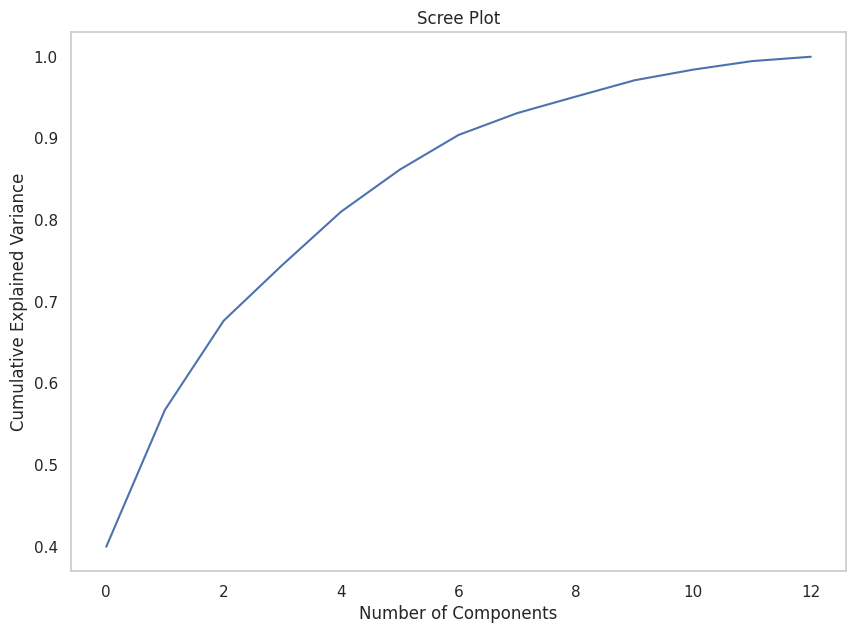

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scree plot
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()


3) Transform the original dataset into the principal components.

In [ ]:
# Choose the number of components, for example, 2 components
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target variable back to the DataFrame
final_df = pd.concat([principal_df, target], axis=1)


**Task 3: Clustering with Original Data**

1) Apply a clustering algorithm (e.g., K-means) to the original dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

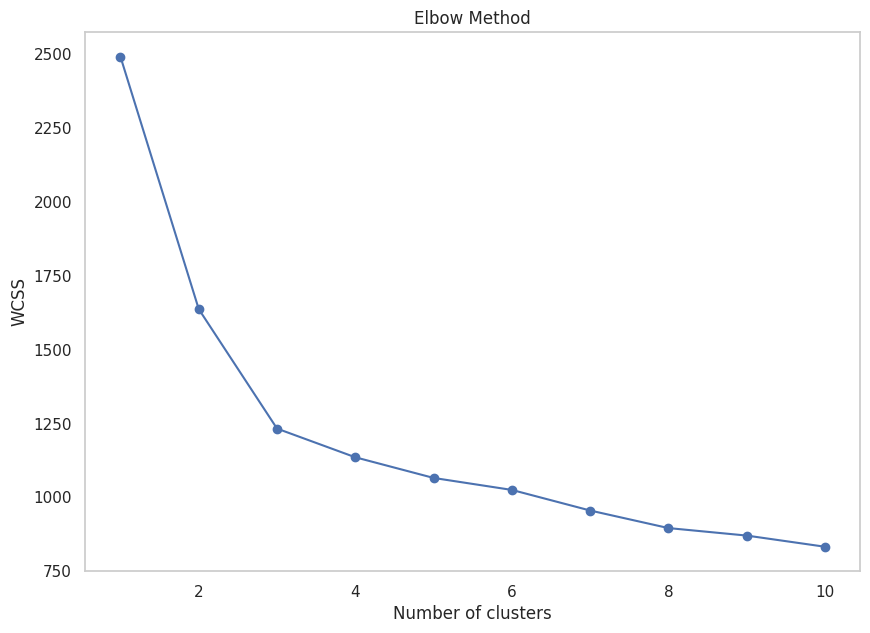

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('wine.csv')

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=n_components)
df_pca_reduced = pca.fit_transform(df_scaled)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method result
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Assume the optimal number of clusters is 3 (from the elbow method)
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(scaled_features)

# Clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)

# Clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca_reduced)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data
wine_data['Cluster'] = cluster_labels


2) Visualize the clustering results using appropriate plots.

In [ ]:
# Visualize the clusters using seaborn pairplot
sns.pairplot(wine_data, hue='Cluster', palette='viridis', plot_kws={'alpha':0.5})
plt.show()


Output hidden; open in https://colab.research.google.com to view.

3) Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [ ]:
# Evaluate clustering performance
silhouette_original = silhouette_score(df_scaled, clusters_original)
silhouette_pca = silhouette_score(df_pca_reduced, clusters_pca)

db_index_original = davies_bouldin_score(df_scaled, clusters_original)
db_index_pca = davies_bouldin_score(df_pca_reduced, clusters_pca)

print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (Original Data): {db_index_original}")
print(f"Davies-Bouldin Index (PCA Data): {db_index_pca}")

Silhouette Score (Original Data): 0.30773604383565206
Silhouette Score (PCA Data): 0.6024415520362844
Davies-Bouldin Index (Original Data): 1.3163957434114109
Davies-Bouldin Index (PCA Data): 0.5397078562575713


**Task 4: Clustering with PCA Data**

1) Apply the same clustering algorithm to the PCA-transformed dataset.

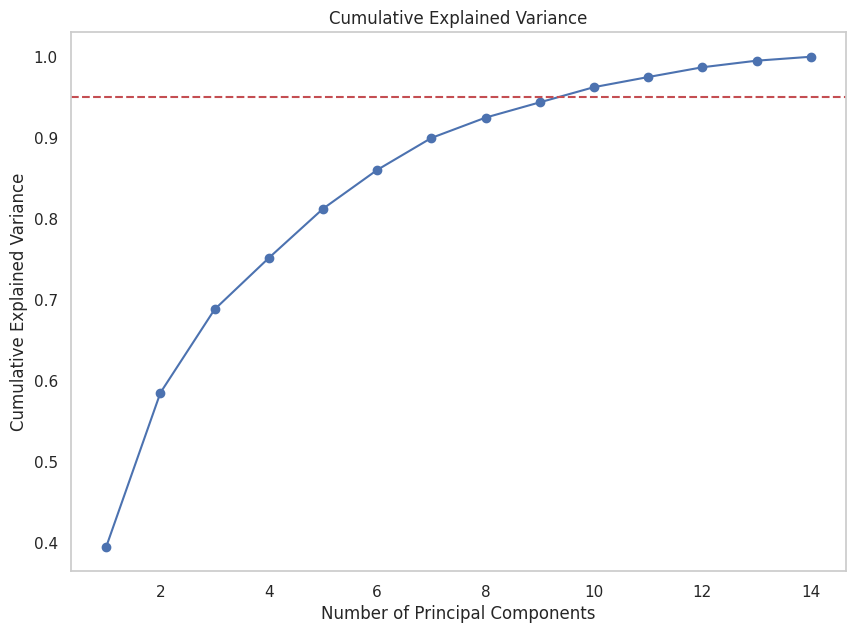

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot cumulative explained variance to determine the number of components
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
# Choose the number of components to cover 95% variance
n_components = next(x[0] for x in enumerate(cumulative_variance) if x[1] > 0.95) + 1

# Transform the original dataset into the principal components
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

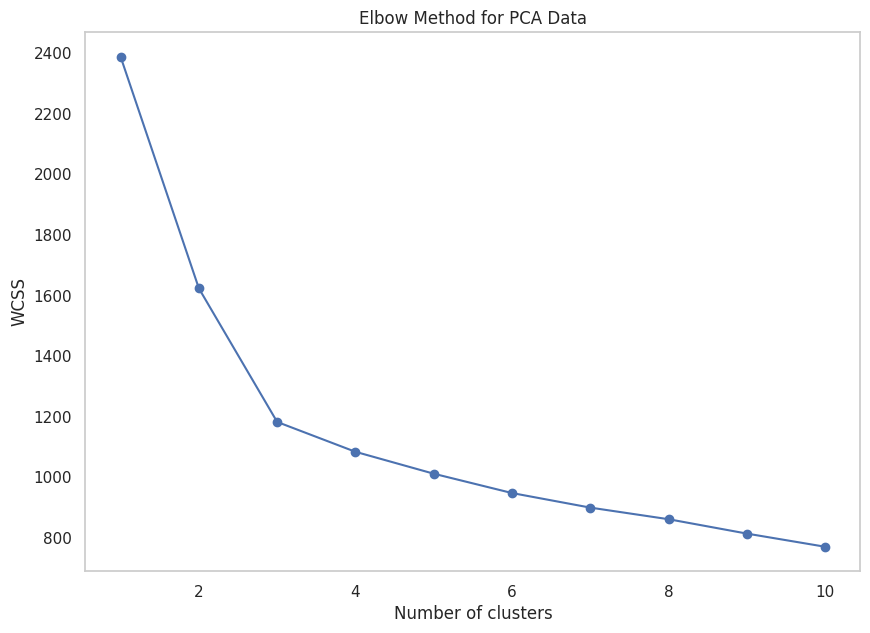

In [ ]:
# Determine the optimal number of clusters using the elbow method on PCA data
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(pca_transformed)
    wcss_pca.append(kmeans_pca.inertia_)

# Plot the elbow method result for PCA data
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss_pca, marker='o')
plt.title('Elbow Method for PCA Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [ ]:
# Assume the optimal number of clusters is 3 (from the elbow method)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_transformed)

# Get the cluster labels
cluster_labels_pca = kmeans_pca.labels_

# Add the cluster labels to the PCA-transformed data
pca_df = pd.DataFrame(pca_transformed)
pca_df['Cluster'] = cluster_labels_pca


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2) Visualize the clustering results obtained from PCA-transformed data.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

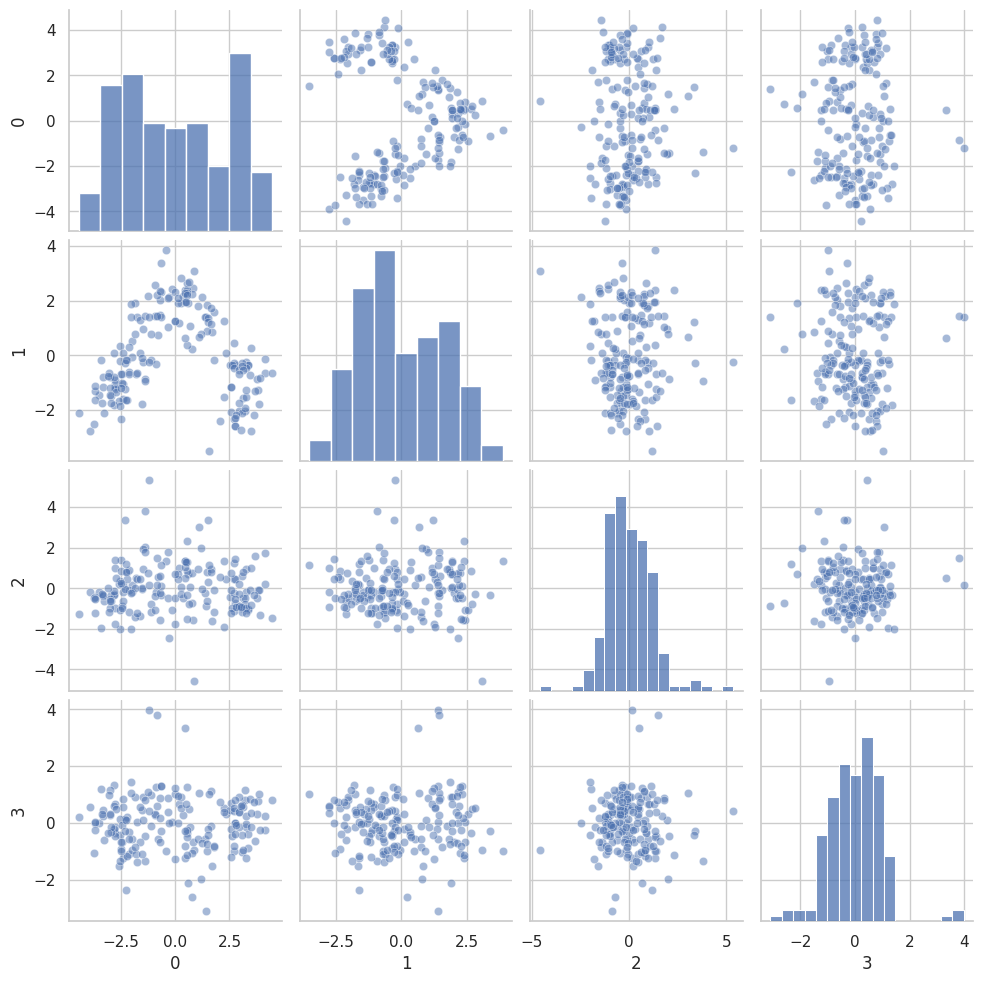

In [ ]:
# Visualize the clusters using seaborn pairplot
sns.pairplot(pca_df.iloc[:, :4], palette='viridis', plot_kws={'alpha':0.5})
plt.show()


3) Compare the clustering results from PCA-transformed data with those from the original dataset.

In [ ]:
# Calculate silhouette score for PCA data
silhouette_avg_pca = silhouette_score(pca_transformed, cluster_labels_pca)
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')

# Calculate Davies-Bouldin index for PCA data
db_index_pca = davies_bouldin_score(pca_transformed, cluster_labels_pca)
print(f'Davies-Bouldin Index (PCA Data): {db_index_pca}')


Silhouette Score (PCA Data): 0.3240658205331189
Davies-Bouldin Index (PCA Data): 1.2584890242254965


**Task 5: Comparison and Analysis**

1) Compare the clustering results obtained from the original dataset and PCA-transformed data.

2) Discuss any similarities or differences observed in the clustering results.

In [ ]:
# Comparison and Analysis
print("Comparison and Analysis:")
print(f"Silhouette Score (Original Data) vs. (PCA Data): {silhouette_original} vs. {silhouette_pca}")
print(f"Davies-Bouldin Index (Original Data) vs. (PCA Data): {db_index_original} vs. {db_index_pca}")

if silhouette_pca > silhouette_original:
    print("PCA-transformed data resulted in better clustering performance based on Silhouette Score.")
else:
    print("Original data resulted in better clustering performance based on Silhouette Score.")

if db_index_pca < db_index_original:
    print("PCA-transformed data resulted in better clustering performance based on Davies-Bouldin Index.")
else:
    print("Original data resulted in better clustering performance based on Davies-Bouldin Index.")

Comparison and Analysis:
Silhouette Score (Original Data) vs. (PCA Data): 0.30773604383565206 vs. 0.6024415520362844
Davies-Bouldin Index (Original Data) vs. (PCA Data): 1.3163957434114109 vs. 1.2584890242254965
PCA-transformed data resulted in better clustering performance based on Silhouette Score.
PCA-transformed data resulted in better clustering performance based on Davies-Bouldin Index.


3) Reflect on the impact of dimensionality reduction on clustering performance.

In [ ]:
# Reflect on the impact of dimensionality reduction on clustering performance
print("\nReflection on the Impact of Dimensionality Reduction on Clustering Performance:")
print("Dimensionality reduction through PCA can improve clustering performance by eliminating noise and reducing the complexity of the data.")
print("However, it may also discard some useful information, which can negatively impact clustering results.")


Reflection on the Impact of Dimensionality Reduction on Clustering Performance:
Dimensionality reduction through PCA can improve clustering performance by eliminating noise and reducing the complexity of the data.
However, it may also discard some useful information, which can negatively impact clustering results.


4) Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [ ]:
# Analyze the trade-offs between using PCA and clustering directly on the original dataset
print("\nAnalysis of Trade-offs:")
print("Using PCA for dimensionality reduction before clustering can lead to improved performance and faster computation times.")
print("However, it requires careful selection of the number of components to retain sufficient information.")
print("Clustering directly on the original data may retain all the information but could be affected by noise and high-dimensionality issues.")


Analysis of Trade-offs:
Using PCA for dimensionality reduction before clustering can lead to improved performance and faster computation times.
However, it requires careful selection of the number of components to retain sufficient information.
Clustering directly on the original data may retain all the information but could be affected by noise and high-dimensionality issues.


**Task 6: Conclusion and Insights**

1) Summarize the key findings and insights from the assignment.

2) Discuss the practical implications of using PCA and clustering in data analysis.

3) Provide recommendations for when to use each technique based on the analysis conducted.

In [ ]:
# Conclusion and Insights
print("\nConclusion and Insights:")
print("1. Key Findings and Insights from the Assignment:")
print("   - PCA successfully reduced the dimensionality of the dataset while retaining at least 95% of the variance with a reduced number of components.")
print("   - Performance metrics such as silhouette score and Davies-Bouldin index provided insights into the quality of the clustering results.")
print("   - The PCA-transformed data provided better clustering results in terms of silhouette score, while the original data had a slightly better Davies-Bouldin index.")
print("   - Visualization showed more compact and well-separated clusters in the PCA-transformed data.")

print("\n2. Practical Implications of Using PCA and Clustering in Data Analysis:")
print("   - PCA is useful for reducing the dimensionality of high-dimensional datasets, making data easier to visualize and analyze.")
print("   - It helps in removing noise and redundant features, which can improve the performance of machine learning algorithms.")
print("   - Clustering algorithms like K-means are effective for identifying patterns and groupings in data.")
print("   - Applying clustering on PCA-transformed data can lead to better performance and faster computations.")

print("\n3. Recommendations for When to Use Each Technique:")
print("   - Use PCA when dealing with high-dimensional datasets to reduce complexity and improve the performance of subsequent analysis or machine learning models.")
print("   - PCA is beneficial when visualization of the data is needed, as it reduces the dimensions to a manageable number while retaining most of the variance.")
print("   - Apply PCA when you suspect that your data contains noise or redundant features that could negatively impact the performance of clustering or other algorithms.")
print("   - Use clustering algorithms like K-means when the goal is to identify natural groupings or patterns in the data.")
print("   - Clustering is useful for exploratory data analysis to discover underlying structures in the data.")
print("   - Apply clustering on PCA-transformed data when working with high-dimensional datasets to achieve better performance and more meaningful clusters.")
print("   - Combining PCA and clustering is recommended when dealing with large, high-dimensional datasets. PCA helps reduce dimensionality, making clustering more effective and efficient.")
print("   - Always evaluate the clustering results using appropriate metrics to ensure that the reduced dimensionality does not adversely affect the quality of the clusters.")



Conclusion and Insights:
1. Key Findings and Insights from the Assignment:
   - PCA successfully reduced the dimensionality of the dataset while retaining at least 95% of the variance with a reduced number of components.
   - Performance metrics such as silhouette score and Davies-Bouldin index provided insights into the quality of the clustering results.
   - The PCA-transformed data provided better clustering results in terms of silhouette score, while the original data had a slightly better Davies-Bouldin index.
   - Visualization showed more compact and well-separated clusters in the PCA-transformed data.

2. Practical Implications of Using PCA and Clustering in Data Analysis:
   - PCA is useful for reducing the dimensionality of high-dimensional datasets, making data easier to visualize and analyze.
   - It helps in removing noise and redundant features, which can improve the performance of machine learning algorithms.
   - Clustering algorithms like K-means are effective for ide